In [50]:
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import statsmodels.api as sm

from datetime import date, datetime, timedelta

In [78]:
path_earning_call_analysts_question=\
'/Volumes/4TB/ConferenceCall/Tesla/csvfile/tesla_earning_call_analysts_question_sentiment.csv'
path_crsp=\
'/Volumes/4TB/ConferenceCall/Tesla/csvfile/crspmonthfromwrdsfilters.csv'
path_earning_call_executives_answer=\
'/Volumes/4TB/ConferenceCall/Tesla/csvfile/tesla_earning_call_executives_answer_sentiment.csv'

In [79]:
data_call_analyst_question_all=pd.read_csv(path_earning_call_analysts_question)
data_call_analyst_question_all['call_datetime']=\
pd.to_datetime(data_call_analyst_question_all['call_datetime'], format='%Y-%m-%d')
data_call_analyst_question_all=data_call_analyst_question_all.sort_values('call_datetime')

data_call_analyst_question_all=\
data_call_analyst_question_all[(data_call_analyst_question_all['call_datetime'] >= datetime(2010, 11, 9))&\
                           (data_call_analyst_question_all['call_datetime'] <= datetime(2023, 2, 28))].reset_index(drop=True)

data_call_executives_answer_all=pd.read_csv(path_earning_call_executives_answer)
data_call_executives_answer_all['call_datetime']=\
pd.to_datetime(data_call_executives_answer_all['call_datetime'], format='%Y-%m-%d')
data_call_executives_answer_all=data_call_executives_answer_all.sort_values('call_datetime')

In [80]:
crsp=pd.read_csv(path_crsp, low_memory=False)
crsp_tesla=crsp[crsp['permno_crspmonth']==93436]
crsp_tesla['date_crspmonth']=\
pd.to_datetime(crsp_tesla['date_crspmonth'], format='%Y-%m-%d')
crsp_tesla=crsp_tesla.sort_values('date_crspmonth')
crsp_tesla=crsp_tesla.reset_index(drop=True)

/var/folders/6l/2d59bcb16yjbzzkcgz02zhn00000gn/T/ipykernel_72411/3394296330.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crsp_tesla['date_crspmonth']=\


In [81]:
crsp_tesla=\
crsp_tesla[(crsp_tesla['date_crspmonth'] >= datetime(2010, 11, 9))&\
           (crsp_tesla['date_crspmonth'] <= datetime(2023, 2, 28))].reset_index(drop=True)

In [82]:
crsp_tesla['ret_crspmonth']=crsp_tesla['ret_crspmonth'].apply(lambda x: float(x))

crsp_tesla['spread_crspmonth']=\
(crsp_tesla['ask_crspmonth']-crsp_tesla['bid_crspmonth'])/crsp_tesla['prc_crspmonth']

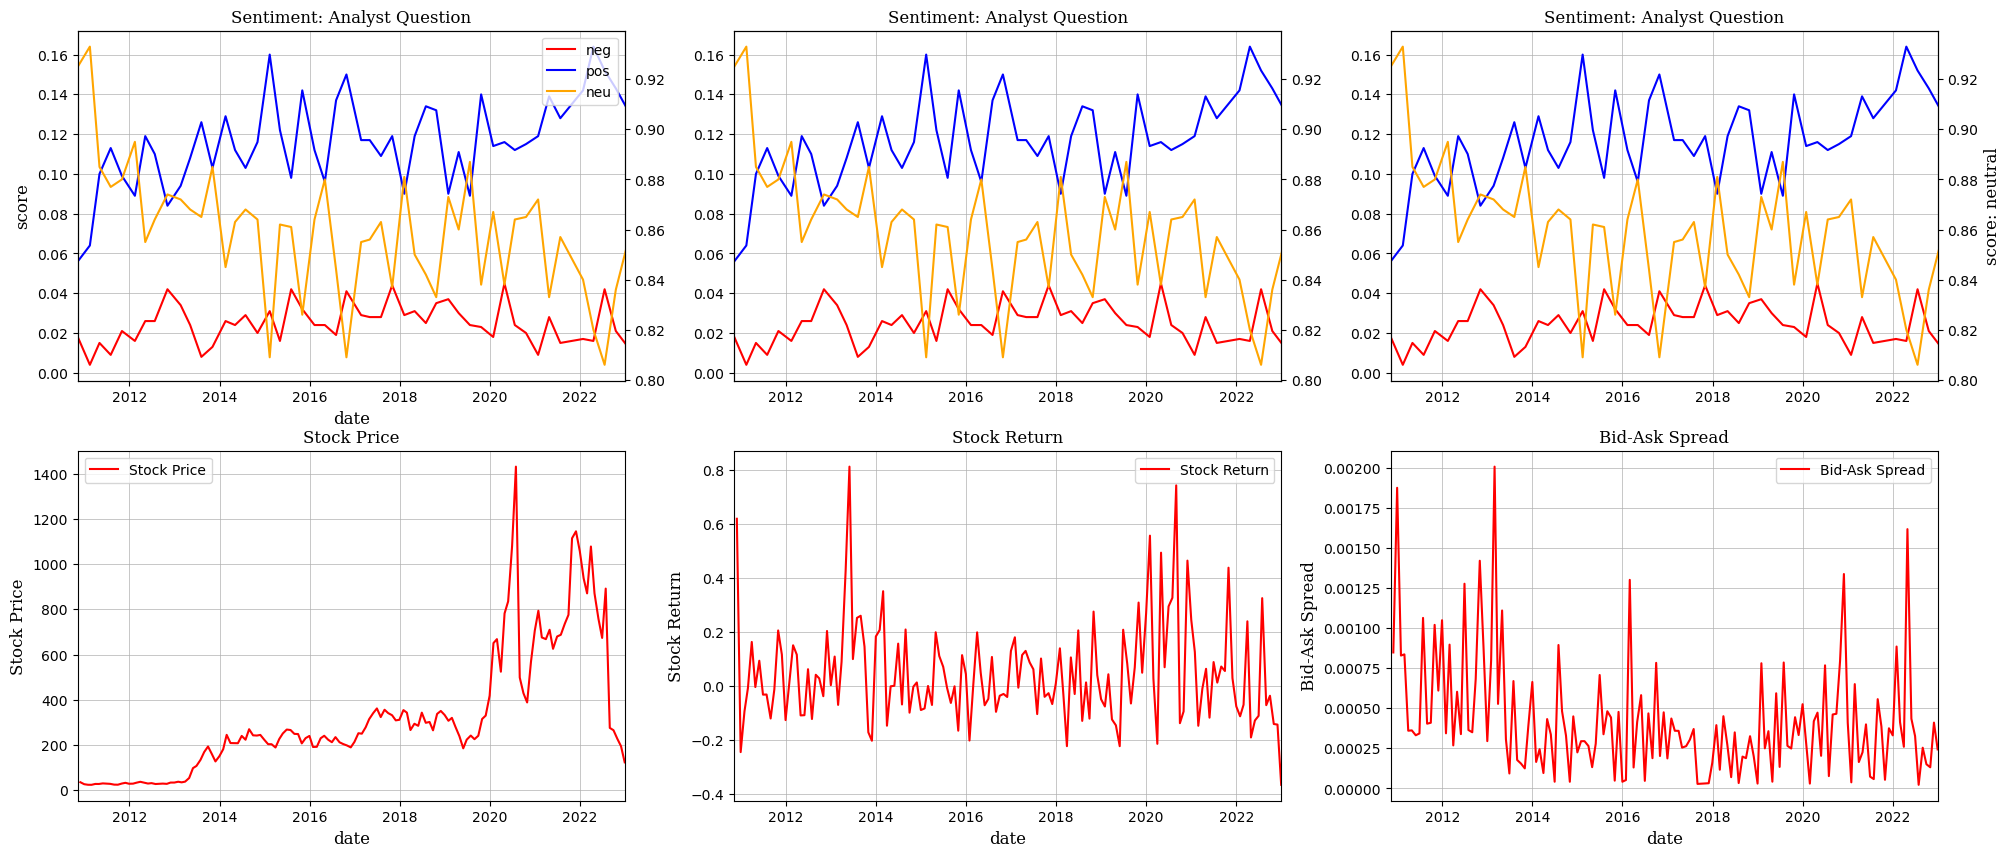

In [68]:
csfont = {'fontname':'serif'}
sizetext=12

fig, ([[ax1, ax2, ax3], [ax4, ax5, ax6]]) =\
plt.subplots(nrows = 2, ncols = 3, figsize = (24, 10))

lns1=\
ax1.plot(data_call_analyst_question_all['call_datetime'],\
         data_call_analyst_question_all['analyst_neg'], label='neg', color='r')
lns2=\
ax1.plot(data_call_analyst_question_all['call_datetime'],\
         data_call_analyst_question_all['analyst_pos'], label='pos', color='b')

ax1.set_title("Sentiment: Analyst Question", **csfont, size = sizetext)
ax1.set_ylabel('score', size = sizetext, **csfont)
ax1.set_xlabel('date', size = sizetext, **csfont)
ax1.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax1.grid(linewidth=0.5)
ax1.legend()

ax11 = ax1.twinx()
lns3=ax11.plot(data_call_analyst_question_all['call_datetime'],\
               data_call_analyst_question_all['analyst_neu'], label='neu', color='orange')
# ax11.set_ylabel('score: neutral', size = sizetext, **csfont)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=1)

ax4.plot(crsp_tesla['date_crspmonth'],\
         crsp_tesla['prc_crspmonth'], label='Stock Price', color='r')

ax4.set_title("Stock Price", **csfont, size = sizetext)
ax4.set_ylabel('Stock Price', size = sizetext, **csfont)
ax4.set_xlabel('date', size = sizetext, **csfont)
ax4.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax4.grid(linewidth=0.5)
ax4.legend()



lns1=\
ax2.plot(data_call_analyst_question_all['call_datetime'],\
         data_call_analyst_question_all['analyst_neg'], color='r')
lns2=\
ax2.plot(data_call_analyst_question_all['call_datetime'],\
         data_call_analyst_question_all['analyst_pos'], color='b')

ax2.set_title("Sentiment: Analyst Question", **csfont, size = sizetext)
# ax2.set_ylabel('score', size = sizetext, **csfont)
# ax2.set_xlabel('date', size = sizetext, **csfont)
ax2.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax2.grid(linewidth=0.5)
# ax2.legend()

ax22 = ax2.twinx()
lns3=ax22.plot(data_call_analyst_question_all['call_datetime'],\
               data_call_analyst_question_all['analyst_neu'], color='orange')
# ax22.set_ylabel('score: neutral', size = sizetext, **csfont)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
# ax22.legend(lns, labs, loc=1)

ax5.plot(crsp_tesla['date_crspmonth'],\
         crsp_tesla['ret_crspmonth'].apply(lambda x: float(x)),
         label='Stock Return', color='r')

ax5.set_title("Stock Return", **csfont, size = sizetext)
ax5.set_ylabel('Stock Return', size = sizetext, **csfont)
ax5.set_xlabel('date', size = sizetext, **csfont)
ax5.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)])
ax5.grid(linewidth=0.5)
ax5.legend()


lns1=\
ax3.plot(data_call_analyst_question_all['call_datetime'],\
         data_call_analyst_question_all['analyst_neg'], color='r')
lns2=\
ax3.plot(data_call_analyst_question_all['call_datetime'],\
         data_call_analyst_question_all['analyst_pos'], color='b')

ax3.set_title("Sentiment: Analyst Question", **csfont, size = sizetext)
# ax2.set_ylabel('score', size = sizetext, **csfont)
# ax2.set_xlabel('date', size = sizetext, **csfont)
ax3.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax3.grid(linewidth=0.5)
# ax2.legend()

ax33 = ax3.twinx()
lns3=ax33.plot(data_call_analyst_question_all['call_datetime'],\
               data_call_analyst_question_all['analyst_neu'], color='orange')
ax33.set_ylabel('score: neutral', size = sizetext, **csfont)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]


ax6.plot(crsp_tesla['date_crspmonth'],\
         crsp_tesla['spread_crspmonth'], label='Bid-Ask Spread', color='r')

ax6.set_title("Bid-Ask Spread", **csfont, size = sizetext)
ax6.set_ylabel('Bid-Ask Spread', size = sizetext, **csfont)
ax6.set_xlabel('date', size = sizetext, **csfont)
ax6.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax6.grid(linewidth=0.5)
ax6.legend()

In [69]:
data_call_analyst_question_all['date_month']=\
data_call_analyst_question_all['call_datetime'].apply(lambda x: x+pd.DateOffset(months=1)) 

data_call_analyst_question_all['date_month']=\
data_call_analyst_question_all['date_month'].dt.to_period('M')

In [70]:
crsp_tesla['date_month']=\
crsp_tesla['date_crspmonth'].dt.to_period('M')

In [71]:
data=\
pd.merge(crsp_tesla,\
         data_call_analyst_question_all,\
         how="inner",\
         on=["date_month"])

In [72]:
data.columns

Index(['permno_crspmonth', 'date_crspmonth', 'shrcd_crspmonth',
       'ncusip_crspmonth', 'ticker_crspmonth', 'COMNAM', 'permco_crspmonth',
       'hexcd_crspmonth', 'cusip_crspmonth', 'prc_crspmonth', 'vol_crspmonth',
       'ret_crspmonth', 'dlret_crspmonth', 'bid_crspmonth', 'ask_crspmonth',
       'shrout_crspmonth', 'spread_crspmonth', 'date_crspmonth_month',
       'date_month', 'time', 'call_datetime', 'call_year', 'call_month',
       'call_day', 'company_name', 'company', 'quarter', 'year_quarter',
       'analysts_question', 'analyst_text', 'analyst_text_removestopwords',
       'analyst_neg', 'analyst_pos', 'analyst_neu', 'call_datetime_month'],
      dtype='object')

In [76]:
Y = data['ret_crspmonth']
X = data[['analyst_neg', 'analyst_pos', 'analyst_neu']]
X = sm.add_constant(X)

model = sm.OLS(endog=Y, exog=X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ret_crspmonth   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.054
Method:                 Least Squares   F-statistic:                    0.2006
Date:                Wed, 15 May 2024   Prob (F-statistic):              0.895
Time:                        10:38:51   Log-Likelihood:                 17.737
No. Observations:                  48   AIC:                            -27.47
Df Residuals:                      44   BIC:                            -19.99
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -9.6094     45.449     -0.211      0.834    -101.207      81.988
analyst_neg     8.8547     45.217      0.196      0.846     -82.274      99.983
analyst_pos     9.0272     45.503      0.198      0.844     -82.679     100.733
analyst_neu     9.7391     45.452      0.214      0.831     -81.863     101.341
==============================================================================
Omnibus:                       30.506   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.126
Skew:                           1.652   Prob(JB):                     8.90e-19
Kurtosis:                       8.535   Cond. No.                     4.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

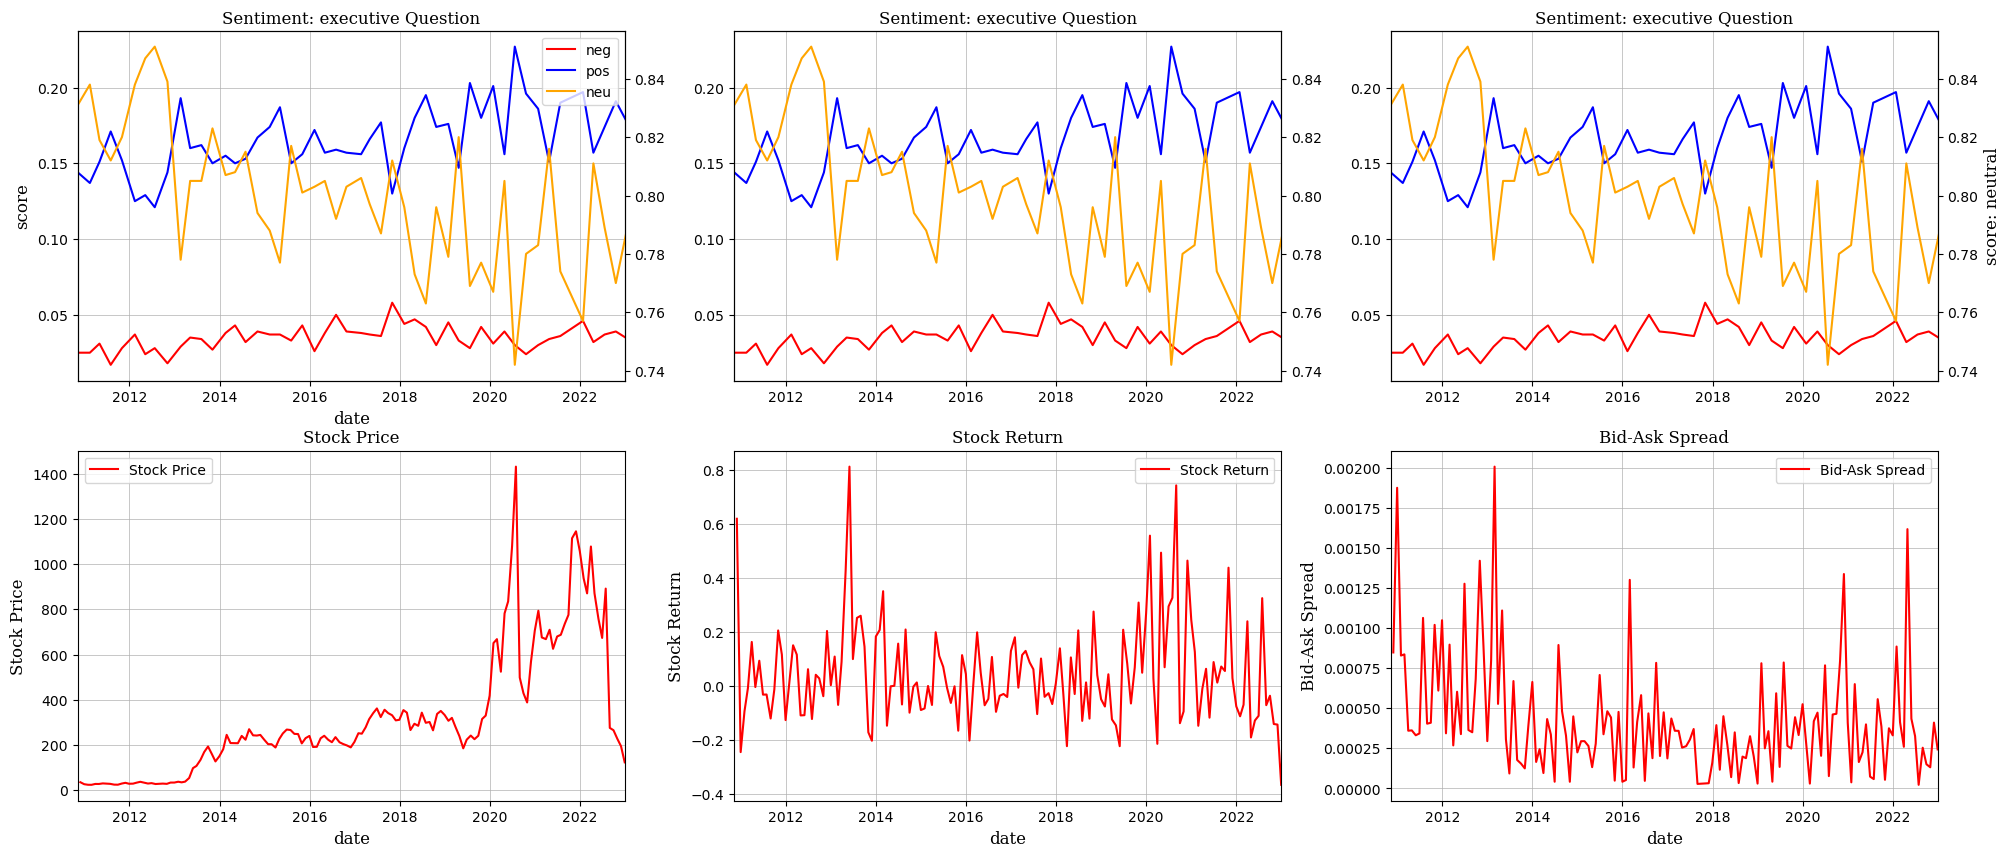

In [83]:
csfont = {'fontname':'serif'}
sizetext=12

fig, ([[ax1, ax2, ax3], [ax4, ax5, ax6]]) =\
plt.subplots(nrows = 2, ncols = 3, figsize = (24, 10))

lns1=\
ax1.plot(data_call_executives_answer_all['call_datetime'],\
         data_call_executives_answer_all['executive_neg'], label='neg', color='r')
lns2=\
ax1.plot(data_call_executives_answer_all['call_datetime'],\
         data_call_executives_answer_all['executive_pos'], label='pos', color='b')

ax1.set_title("Sentiment: executive Question", **csfont, size = sizetext)
ax1.set_ylabel('score', size = sizetext, **csfont)
ax1.set_xlabel('date', size = sizetext, **csfont)
ax1.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax1.grid(linewidth=0.5)
ax1.legend()

ax11 = ax1.twinx()
lns3=ax11.plot(data_call_executives_answer_all['call_datetime'],\
               data_call_executives_answer_all['executive_neu'], label='neu', color='orange')
# ax11.set_ylabel('score: neutral', size = sizetext, **csfont)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=1)

ax4.plot(crsp_tesla['date_crspmonth'],\
         crsp_tesla['prc_crspmonth'], label='Stock Price', color='r')

ax4.set_title("Stock Price", **csfont, size = sizetext)
ax4.set_ylabel('Stock Price', size = sizetext, **csfont)
ax4.set_xlabel('date', size = sizetext, **csfont)
ax4.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax4.grid(linewidth=0.5)
ax4.legend()



lns1=\
ax2.plot(data_call_executives_answer_all['call_datetime'],\
         data_call_executives_answer_all['executive_neg'], color='r')
lns2=\
ax2.plot(data_call_executives_answer_all['call_datetime'],\
         data_call_executives_answer_all['executive_pos'], color='b')

ax2.set_title("Sentiment: executive Question", **csfont, size = sizetext)
# ax2.set_ylabel('score', size = sizetext, **csfont)
# ax2.set_xlabel('date', size = sizetext, **csfont)
ax2.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax2.grid(linewidth=0.5)
# ax2.legend()

ax22 = ax2.twinx()
lns3=ax22.plot(data_call_executives_answer_all['call_datetime'],\
               data_call_executives_answer_all['executive_neu'], color='orange')
# ax22.set_ylabel('score: neutral', size = sizetext, **csfont)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
# ax22.legend(lns, labs, loc=1)

ax5.plot(crsp_tesla['date_crspmonth'],\
         crsp_tesla['ret_crspmonth'].apply(lambda x: float(x)),
         label='Stock Return', color='r')

ax5.set_title("Stock Return", **csfont, size = sizetext)
ax5.set_ylabel('Stock Return', size = sizetext, **csfont)
ax5.set_xlabel('date', size = sizetext, **csfont)
ax5.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)])
ax5.grid(linewidth=0.5)
ax5.legend()


lns1=\
ax3.plot(data_call_executives_answer_all['call_datetime'],\
         data_call_executives_answer_all['executive_neg'], color='r')
lns2=\
ax3.plot(data_call_executives_answer_all['call_datetime'],\
         data_call_executives_answer_all['executive_pos'], color='b')

ax3.set_title("Sentiment: executive Question", **csfont, size = sizetext)
# ax2.set_ylabel('score', size = sizetext, **csfont)
# ax2.set_xlabel('date', size = sizetext, **csfont)
ax3.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax3.grid(linewidth=0.5)
# ax2.legend()

ax33 = ax3.twinx()
lns3=ax33.plot(data_call_executives_answer_all['call_datetime'],\
               data_call_executives_answer_all['executive_neu'], color='orange')
ax33.set_ylabel('score: neutral', size = sizetext, **csfont)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]


ax6.plot(crsp_tesla['date_crspmonth'],\
         crsp_tesla['spread_crspmonth'], label='Bid-Ask Spread', color='r')

ax6.set_title("Bid-Ask Spread", **csfont, size = sizetext)
ax6.set_ylabel('Bid-Ask Spread', size = sizetext, **csfont)
ax6.set_xlabel('date', size = sizetext, **csfont)
ax6.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax6.grid(linewidth=0.5)
ax6.legend()

In [89]:
data_call_executives_answer_all['date_month']=\
data_call_analyst_question_all['call_datetime'].apply(lambda x: x+pd.DateOffset(months=1)) 

data_call_executives_answer_all['date_month']=\
data_call_executives_answer_all['date_month'].dt.to_period('M')

crsp_tesla['date_month']=\
crsp_tesla['date_crspmonth'].dt.to_period('M')

In [90]:
data=\
pd.merge(crsp_tesla,\
         data_call_executives_answer_all,\
         how="inner",\
         on=["date_month"])

In [93]:
Y = data['ret_crspmonth']
X = data[['executive_neg', 'executive_pos', 'executive_neu']]
X = sm.add_constant(X)

model = sm.OLS(endog=Y, exog=X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ret_crspmonth   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     1.679
Date:                Wed, 15 May 2024   Prob (F-statistic):              0.185
Time:                        10:43:15   Log-Likelihood:                 20.012
No. Observations:                  48   AIC:                            -32.02
Df Residuals:                      44   BIC:                            -24.54
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -10.8534     47.109     -0.230      0.819    -105.795      84.088
executive_neg     7.1537     47.199      0.152      0.880     -87.970     102.278
executive_pos    12.8250     47.416      0.270      0.788     -82.736     108.386
executive_neu    10.6376     47.045      0.226      0.822     -84.175     105.450
==============================================================================
Omnibus:                       12.182   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.514
Skew:                           0.950   Prob(JB):                      0.00116
Kurtosis:                       4.773   Cond. No.                     5.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""